In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) ## Couldn't see the list I made inside columns.

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
test_file = 'Input_Data/test.csv'
train_file = 'Input_Data/train.csv'

In [3]:
test_data = pd.read_csv(test_file)
train_data = pd.read_csv(train_file)

# drop_outcome_df = train_data.copy()
# drop_outcome_df = drop_outcome_df.drop(['outcome'],axis=1)

In [4]:
test_data

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,normal,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,slight,more_1_liter,2.0,absent,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,less_3_sec,mild_pain,absent,slight,slight,none,3.0,decreased,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,None,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,2.0,absent,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,None,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,None,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [5]:
train_data

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,None,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,2.0,None,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,decreased,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,increased,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,2.0,absent,distend_small,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [6]:
train_data.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [7]:
##prints out the unique columns

# string_columns = train_data.select_dtypes(include=['object'])

# unique_words = {}
# for column in string_columns.columns:
#     unique_values = string_columns[column].unique()
#     unique_words[column] = unique_values
    
# for column, unique_values in unique_words.items():
#     print(f'Unique values in {column}:')
#     for value in unique_values:
#         print(value)
#     print()

In [8]:
table = pd.DataFrame({"Feature":[],"missing":[],"unique":[]})

for column in train_data.columns:
    table.loc[len(table.index)] = [column,sum(pd.isnull(x) for x in train_data[column]),len(set(x for x in train_data[column]))]
    
display(table)
# null_train_values = train_data.isnull().sum()
# null_train_values

,Feature,missing,unique
0,id,0,1235
1,surgery,0,2
2,age,0,2
3,hospital_number,0,255
4,rectal_temp,0,43
5,pulse,0,50
6,respiratory_rate,0,37
7,temp_of_extremities,0,5
8,peripheral_pulse,0,5
9,mucous_membrane,0,7


In [9]:
string_columns = train_data.select_dtypes(include=['object'])

unique_values_dict = {}

for column in string_columns.columns:
    uv = string_columns[column].unique()
    unique_values_dict[column] = [uv.tolist()]
    
unique_values_df = pd.DataFrame.from_dict(unique_values_dict)

#############################################################

string_columns = test_data.select_dtypes(include=['object'])

unique_values_dict = {}

for column in string_columns.columns:
    uv = string_columns[column].unique()
    unique_values_dict[column] = [uv.tolist()]
    
test_unique_values_df = pd.DataFrame.from_dict(unique_values_dict)    

In [10]:
unique_values_df

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
0,"[yes, no]","[adult, young]","[cool, cold, normal, warm, None]","[reduced, normal, None, absent, increased]","[dark_cyanotic, pale_cyanotic, pale_pink, normal_pink, bright_pink, bright_red, None]","[more_3_sec, less_3_sec, None, 3]","[depressed, mild_pain, extreme_pain, alert, severe_pain, None, slight]","[absent, hypomotile, normal, hypermotile, None, distend_small]","[slight, moderate, none, severe, None]","[slight, none, significant, None]","[less_1_liter, more_1_liter, none, None, slight]","[decreased, absent, None, normal, increased, serosanguious]","[distend_small, distend_large, normal, firm, None, other]","[serosanguious, cloudy, clear, None]","[yes, no]","[no, yes]","[died, euthanized, lived]"


In [11]:
test_unique_values_df

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,"[no, yes]","[adult, young]","[normal, cool, None, cold, warm]","[normal, reduced, None, absent, increased]","[normal_pink, bright_pink, bright_red, pale_cyanotic, dark_cyanotic, pale_pink, None]","[less_3_sec, more_3_sec, None, 3]","[mild_pain, depressed, severe_pain, extreme_pain, None, moderate, alert]","[hypomotile, absent, hypermotile, None, normal]","[slight, moderate, severe, none, None]","[none, slight, None, significant]","[none, more_1_liter, less_1_liter, None]","[normal, decreased, absent, None, increased]","[distend_small, distend_large, None, other, firm, normal]","[clear, serosanguious, cloudy, None]","[no, yes]","[no, yes]"


In [12]:
test_data_column_list = test_data.columns.tolist()
train_data_column_list = train_data.columns.tolist()

In [13]:
diff = pd.DataFrame()

for column in test_data_column_list:
    differences = train_data[column][0] != test_data[column][0]
    diff[column] = differences
    
diff

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data


In [14]:
len(test_data_column_list)

28

In [15]:
len(train_data_column_list)

29

In [16]:
train_data_column_list.remove('outcome')

In [17]:
different_columns = set(train_data.columns) - set(test_data.columns)

different_columns

{'outcome'}

In [18]:
if train_data_column_list == test_data_column_list:
    print('True')

True


### There are several things that can be chaged in these dataframes.
#### These note are more for my benefit but will be left here

##### capillary 
time can be numeric  0, 2,3,4
##### pain 
column has moderate in test only
##### peristalsis
train has distend_small
##### rectal_exam_feces
has serosanguious in train

Just found out that some horses died twice.  Do not drop those horses though as it significantly impairs the calculation.

In [19]:
## Replacing object nan_values with no_measure_take.  Its not clear if a measure was taken or not but in some instances it appears a measure was not needed

def replace_nans_values(dataframe):
    object_columns = dataframe.select_dtypes(include='object').columns
    numeric_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns
    
    dataframe[object_columns] = dataframe[object_columns].fillna('no_measure_taken')
    dataframe[numeric_columns] = dataframe[numeric_columns].fillna(0)
    
    return dataframe

train_data = replace_nans_values(train_data)
test_data = replace_nans_values(test_data)

# train_data['hospital_number'] = train_data['hospital_number'].astype('object')
# test_data['hospital_number'] = test_data['hospital_number'].astype('object')



## Make int64 and float64 nan to 0   



## Make Capillary object.  change nan to no measure take

## Keep Capillary but change nan to no measure taken

## remove distend_small from training
count_distend_small = train_data[train_data['peristalsis'].str.contains('distend_small')].shape[0]
print(f'Rows with distend_small:  {count_distend_small}')
train_data['peristalsis'] = train_data['peristalsis'].str.replace('distend_small','normal')

## remove serosanguious in training
count_serosanguious = train_data[train_data['rectal_exam_feces'].str.contains('serosanguious')].shape[0]
print(f'Rows with serosanguious: {count_serosanguious}')
train_data['rectal_exam_feces'] = train_data['rectal_exam_feces'].str.replace('serosanguious','normal')

## remove moderate from test
test_data['pain'] = test_data['pain'].str.replace('moderate','mild_pain')



Rows with distend_small:  1
Rows with serosanguious: 1


array([[<Axes: title={'center': 'hospital_number'}>,
        <Axes: title={'center': 'rectal_temp'}>,
        <Axes: title={'center': 'pulse'}>],
       [<Axes: title={'center': 'respiratory_rate'}>,
        <Axes: title={'center': 'nasogastric_reflux_ph'}>,
        <Axes: title={'center': 'packed_cell_volume'}>],
       [<Axes: title={'center': 'total_protein'}>,
        <Axes: title={'center': 'abdomo_protein'}>,
        <Axes: title={'center': 'lesion_1'}>],
       [<Axes: title={'center': 'lesion_2'}>,
        <Axes: title={'center': 'lesion_3'}>, <Axes: >]], dtype=object)

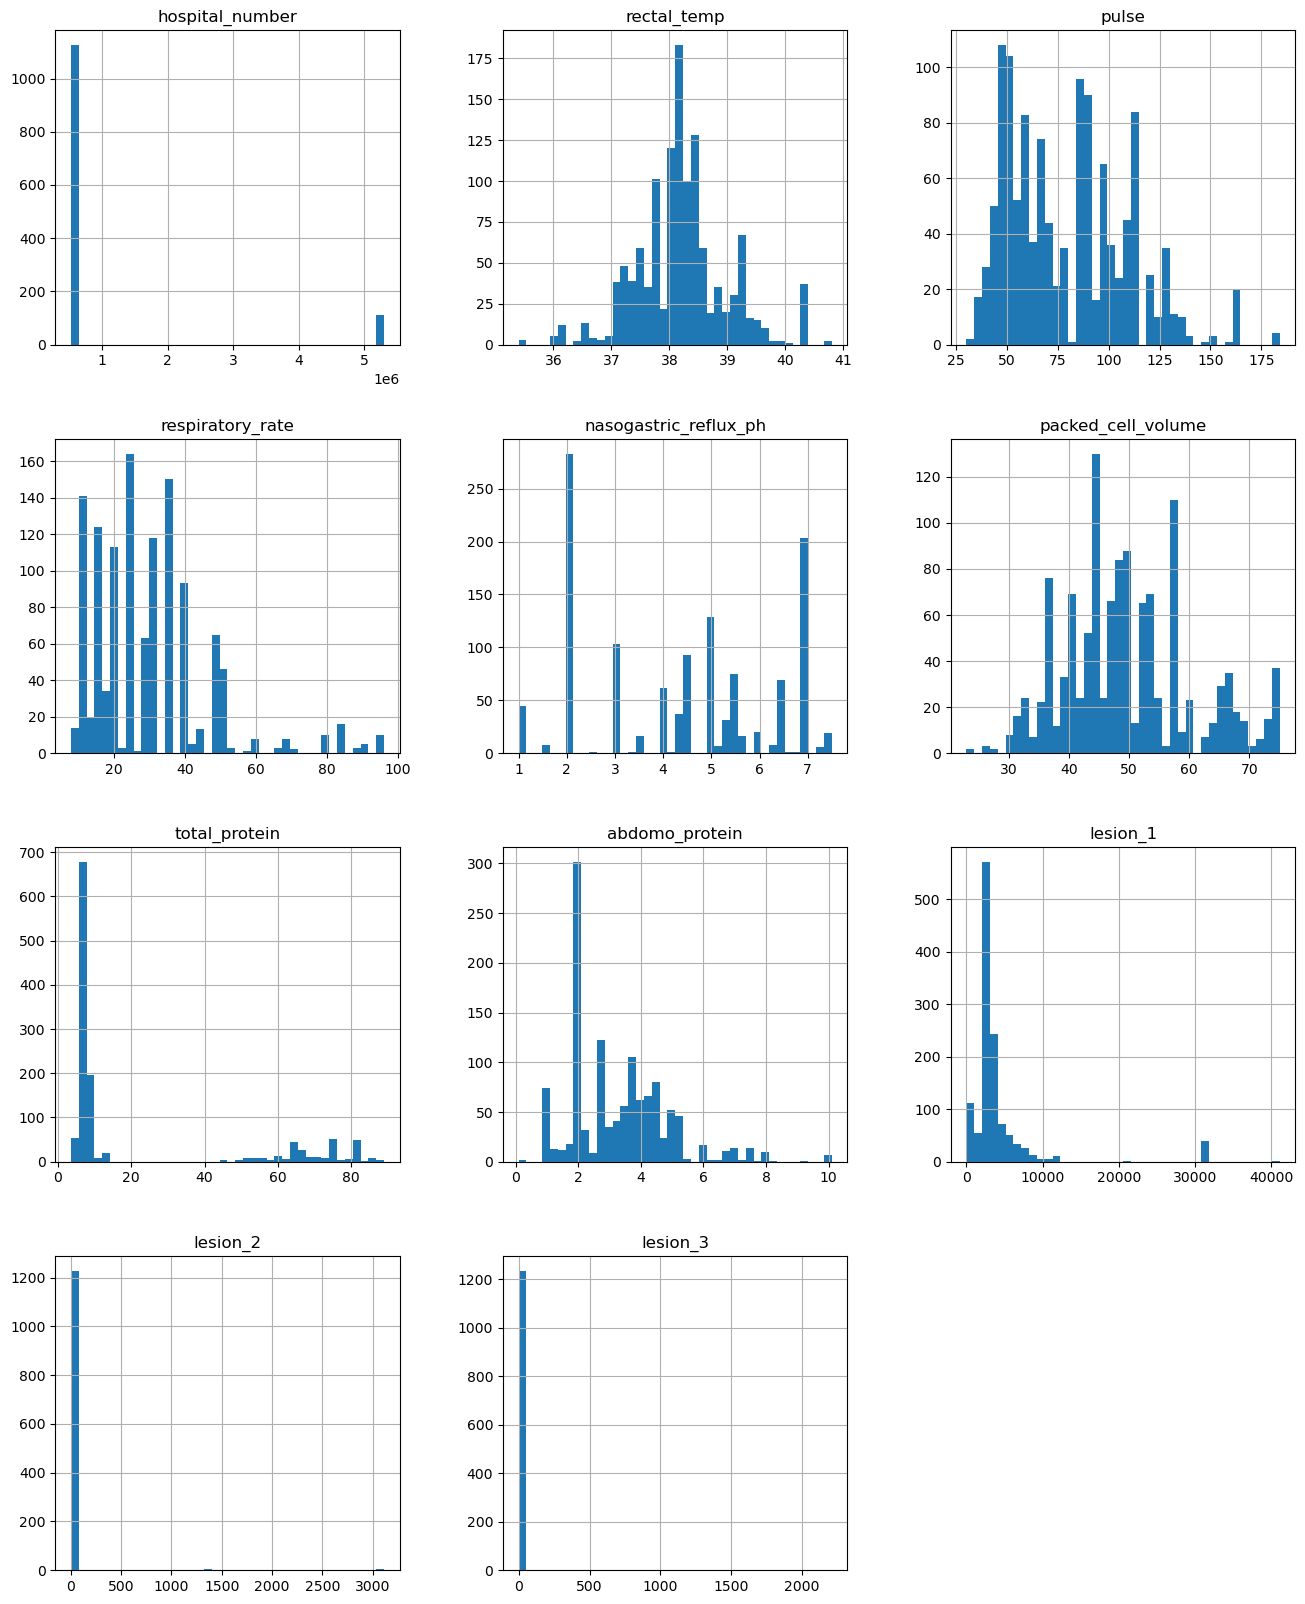

In [20]:
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])

numerical_columns.hist(figsize=(16,20),bins=40, xlabelsize=10, ylabelsize=10)



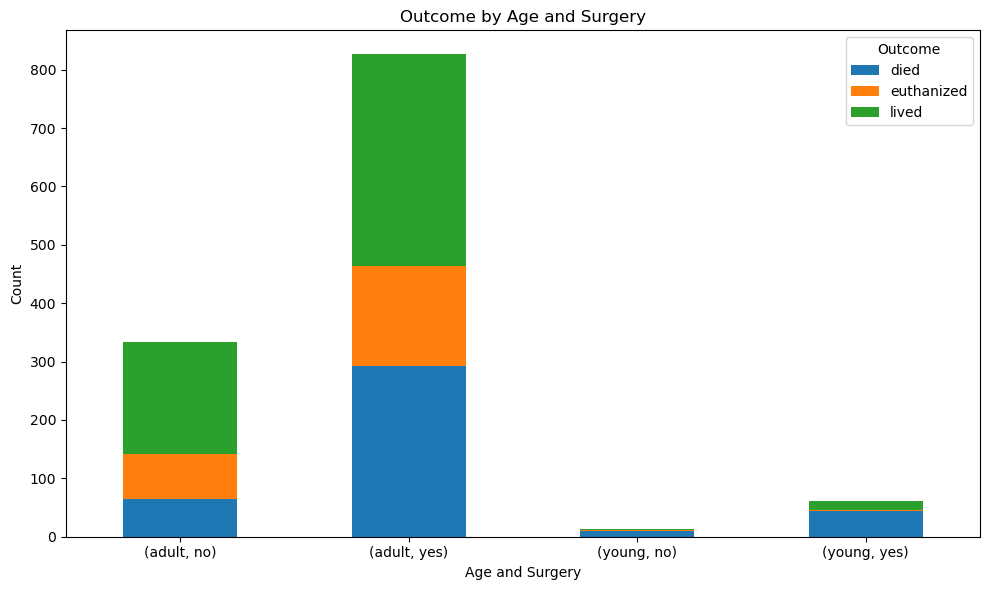

In [21]:
grouping = train_data.groupby(['age','surgery','outcome']).size().unstack(fill_value=0)

ax = grouping.plot(kind='bar', stacked=True, figsize=(10,6))

ax.set_xlabel('Age and Surgery')
ax.set_ylabel('Count')
ax.set_title('Outcome by Age and Surgery')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Abdomo Protein')

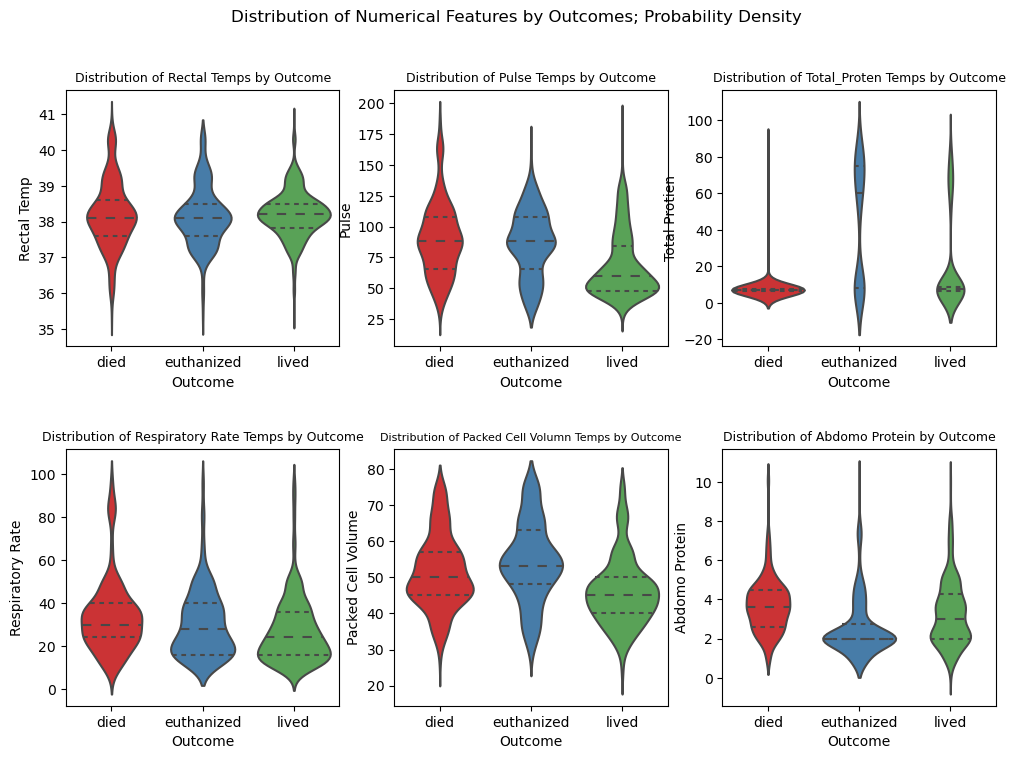

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(12,8), gridspec_kw={'hspace':0.4})

fig.suptitle("Distribution of Numerical Features by Outcomes; Probability Density")

sns.violinplot(x='outcome',y='rectal_temp',data=train_data, inner='quart', palette='Set1',ax=axes[0,0])
axes[0,0].set_title('Distribution of Rectal Temps by Outcome',fontsize=9)
axes[0,0].set_xlabel('Outcome')
axes[0,0].set_ylabel('Rectal Temp')

sns.violinplot(x='outcome',y='pulse',data=train_data, inner='quart', palette='Set1',ax=axes[0,1])
axes[0,1].set_title('Distribution of Pulse Temps by Outcome',fontsize=9)
axes[0,1].set_xlabel('Outcome')
axes[0,1].set_ylabel('Pulse')

sns.violinplot(x='outcome',y='total_protein',data=train_data, inner='quart', palette='Set1',ax=axes[0,2])
axes[0,2].set_title('Distribution of Total_Proten Temps by Outcome',fontsize=9)
axes[0,2].set_xlabel('Outcome')
axes[0,2].set_ylabel('Total Protien')

sns.violinplot(x='outcome',y='respiratory_rate',data=train_data, inner='quart', palette='Set1',ax=axes[1,0])
axes[1,0].set_title('Distribution of Respiratory Rate Temps by Outcome',fontsize=9)
axes[1,0].set_xlabel('Outcome')
axes[1,0].set_ylabel('Respiratory Rate')

sns.violinplot(x='outcome',y='packed_cell_volume',data=train_data, inner='quart', palette='Set1',ax=axes[1,1])
axes[1,1].set_title('Distribution of Packed Cell Volumn Temps by Outcome',fontsize=8)
axes[1,1].set_xlabel('Outcome')
axes[1,1].set_ylabel('Packed Cell Volume')

sns.violinplot(x='outcome',y='abdomo_protein',data=train_data, inner='quart', palette='Set1',ax=axes[1,2])
axes[1,2].set_title('Distribution of Abdomo Protein by Outcome',fontsize=9)
axes[1,2].set_xlabel('Outcome')
axes[1,2].set_ylabel('Abdomo Protein')



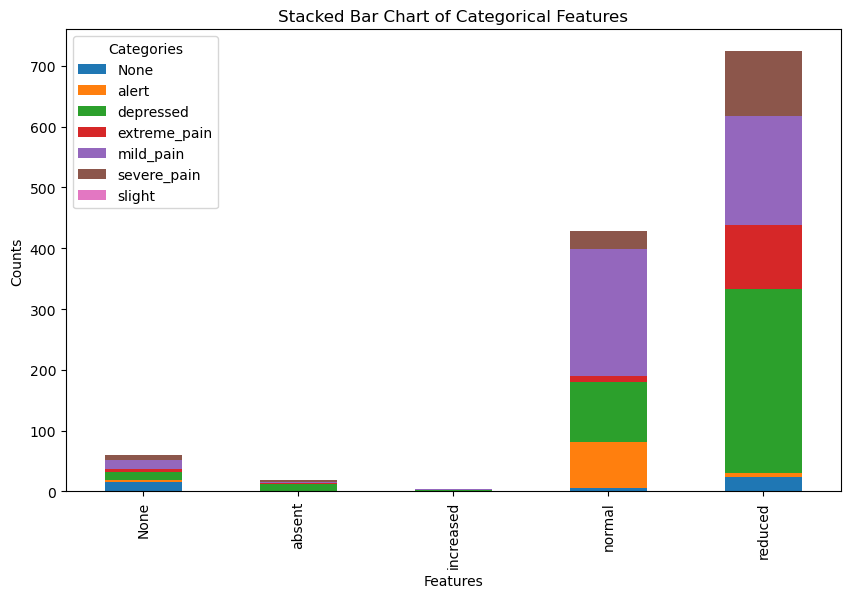

In [23]:
# object_counts = train_data.apply(pd.value_counts).fillna(0).T
# ax = object_counts.plot(kind='bar',stacked=True,figsize=(10,6))

# melted_df = pd.melt(train_data)
# ax = melted_df['value'].value_counts().unstack().fillna(0).T.plot(kind='bar',stacked=True,figsize=(10,6))

ct = pd.crosstab(train_data['peripheral_pulse'],train_data['pain'])

ax = ct.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Stacked Bar Chart of Categorical Features")
plt.xlabel("Features")
plt.ylabel("Counts")
plt.legend(title="Categories")
plt.show()

In [24]:
## This is heavily borrowed and requires research
## Cramers V statistic - Association between categorical variables

## Works but produces a runtime error better to OneHotEncode

# from scipy.stats import chi2_contingency
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
#     rcorr = r - ((r - 1) ** 2) / (n - 1)
#     kcorr = k - ((k - 1) ** 2) / (n - 1)
#     return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# corr_matrix = np.zeros((len(train_data.columns), len(train_data.columns)))
# columns = train_data.columns

# for i in range(len(columns)):
#     for j in range(len(columns)):
#         if i != j:
#             corr_matrix[i, j] = cramers_v(train_data[columns[i]], train_data[columns[j]])

# plt.figure(figsize=(10, 6))
# sns.set(font_scale=1.2)
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", xticklabels=columns, yticklabels=columns, cmap="coolwarm", linewidths=0.5)
# plt.title("Categorical Feature Correlation (Cramer's V)")
# plt.show()

# Feature Selections

In [25]:
X_train = train_data.drop(['id','outcome','lesion_3'],axis=1)
y_train = train_data['outcome']
X_test = test_data.drop(['id','lesion_3'],axis=1)

#object_columns = [oname for oname in X_train.columns if
                 #X_train[oname].dtype == 'object']
    
object_columns = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
transformers=[
    ('cat', OneHotEncoder(),object_columns)
],remainder='passthrough')

# X_train = preprocessor.fit_transform(X_train)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection',SelectKBest(k=28)),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)


selected_feature_indices = pipeline.named_steps['feature_selection'].get_support()


original_column_names = X_train.columns


selected_features = [col_name for selected, col_name in zip(selected_feature_indices, original_column_names) if selected]

prediction = pipeline.predict(X_test)
test_data['outcome'] = prediction
# print(prediction)
# print("Selected Features:", selected_features)

# output_y = test_data[['id','outcome']]
# output_y.to_csv('outputXX.csv',index=False)


C:\Users\awnet\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [10:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


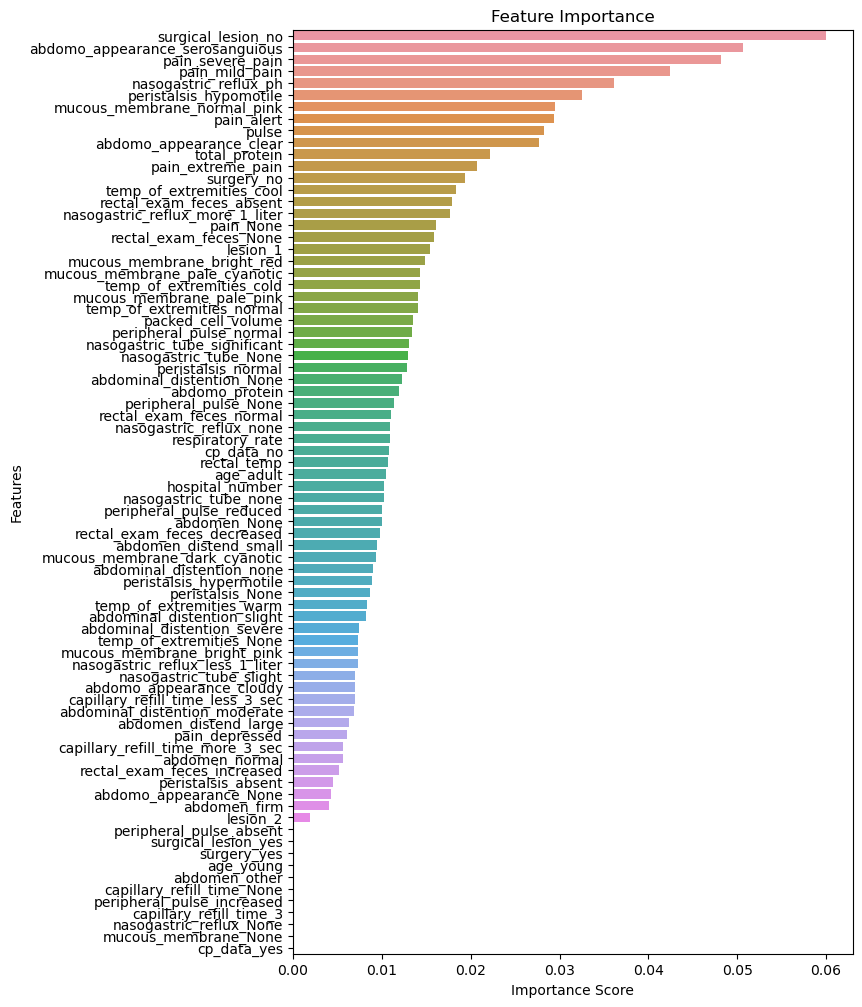

In [26]:
le = LabelEncoder()
train_data['encoded_outcome'] = le.fit_transform(train_data['outcome'])
y_encoded = train_data['encoded_outcome']

X_train = train_data.drop(['id','outcome','lesion_3','encoded_outcome'],axis=1)
X_test = test_data.drop(['id','lesion_3','outcome'],axis=1)

X_test

dummies_train = X_train.select_dtypes(include='object')
dummies_test = X_test.select_dtypes(include='object')

test_dummies_df = pd.get_dummies(X_test, columns=dummies_test.columns)
train_dummies_df = pd.get_dummies(X_train, columns=dummies_train.columns)

##shapes are misaligned again.  need to compare dataframes

columns_in_train = train_dummies_df.columns
columns_in_test = test_dummies_df.columns

# columns_in_train = [col for col in columns_in_train if col not in columns_in_test]
# print(columns_in_train)##['pain_slight', 'nasogastric_reflux_slight']

# columns_in_test = [col for col in columns_in_test if col not in columns_in_train]
# print(columns_in_test)

def remove_missing_columns(df,column_set):
    for column in column_set:
        if column in df.columns:
            df = df.drop(columns=column)
    return df

missing_columns = ['pain_slight', 'nasogastric_reflux_slight']

test_dummies_df = remove_missing_columns(test_dummies_df,missing_columns)
train_dummies_df = remove_missing_columns(train_dummies_df, missing_columns)




xgb_model = xgb.XGBClassifier(learning_rate=0.5, n_estimator=1000, max_depth=3,
                              objective='binary:logistic')

xgb_model.fit(train_dummies_df,y_encoded)
predictions = xgb_model.predict(test_dummies_df)


feature_importance = xgb_model.feature_importances_

feature_names = train_dummies_df.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(8,12))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
#plt.yticks(rotation=45)
plt.subplots_adjust(left=0.2)
plt.tight_layout
plt.show()



In [27]:
labels = ['died', 'euthanized', 'lived']

leII = LabelEncoder()
leII.fit(labels)

encoded_label = leII.transform(labels)

labels = leII.inverse_transform(predictions)




test_data['outcome'] = labels


output_y = test_data[['id','outcome']]
output_y.to_csv('outputXXX.csv',index=False)